In [63]:
import pandas as pd
from sqlalchemy import create_engine

## connect to Database

In [64]:
engine = create_engine("sqlite:///data/MTA_2019.db")

## Get data from MTA website

In [65]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190928,190921,190914,190907,191005,191012,191019,191026,191102,191109,191116
             ,191123,191130]
turnstiles_df = get_data(week_nums)

In [66]:
#remove space from column name
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns] 

#trasform date tp datetime datatype
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [67]:
#see if there is duplicates
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          ascending=False).head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
205543,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,20:00:00,REGULAR,5554,420,2019-11-29 20:00:00
205542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,16:00:00,REGULAR,5554,420,2019-11-29 16:00:00
205541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,12:00:00,REGULAR,5554,420,2019-11-29 12:00:00
205540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,08:00:00,REGULAR,5554,420,2019-11-29 08:00:00
205539,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,04:00:00,REGULAR,5554,420,2019-11-29 04:00:00
205538,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,00:00:00,REGULAR,5554,420,2019-11-29 00:00:00
205537,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/28/2019,20:00:00,REGULAR,5554,420,2019-11-28 20:00:00
205536,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/28/2019,16:00:00,REGULAR,5554,420,2019-11-28 16:00:00
205535,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/28/2019,12:00:00,REGULAR,5554,420,2019-11-28 12:00:00
205534,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/28/2019,08:00:00,REGULAR,5554,420,2019-11-28 08:00:00


In [68]:
# delete rows if desc is not regular
turnstiles_df=turnstiles_df.loc[turnstiles_df['DESC'] == "REGULAR"]

In [69]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", 
           "DATE_TIME","LINENAME"])[["ENTRIES"]].count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,LINENAME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-08-31 00:00:00,NQR456W,1
1777003,R138,R293,00-02-05,34 ST-PENN STA,2019-11-14 05:00:00,123ACE,1
1776985,R138,R293,00-02-05,34 ST-PENN STA,2019-11-11 05:00:00,123ACE,1
1776986,R138,R293,00-02-05,34 ST-PENN STA,2019-11-11 09:00:00,123ACE,1
1776987,R138,R293,00-02-05,34 ST-PENN STA,2019-11-11 13:00:00,123ACE,1
1776988,R138,R293,00-02-05,34 ST-PENN STA,2019-11-11 17:00:00,123ACE,1
1776989,R138,R293,00-02-05,34 ST-PENN STA,2019-11-11 21:00:00,123ACE,1
1776990,R138,R293,00-02-05,34 ST-PENN STA,2019-11-12 01:00:00,123ACE,1
1776991,R138,R293,00-02-05,34 ST-PENN STA,2019-11-12 05:00:00,123ACE,1
1776992,R138,R293,00-02-05,34 ST-PENN STA,2019-11-12 09:00:00,123ACE,1


In [70]:
import numpy as np

station_df =turnstiles_df.groupby(["STATION","DATE_TIME"])[["ENTRIES"]].sum()
station_df["FOUR_HOURS_STATION_ENTRIES"]=station_df.groupby(["STATION"]).ENTRIES.diff()

station_df["FOUR_HOURS_STATION_ENTRIES"]=(
np.where((
    (station_df.ENTRIES ==0) & (station_df.FOUR_HOURS_STATION_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET0 
    , 
    np.where((station_df.ENTRIES !=0) & (station_df.FOUR_HOURS_STATION_ENTRIES < 0)
             , abs(station_df.FOUR_HOURS_STATION_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
         station_df.FOUR_HOURS_STATION_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))


In [71]:
#drop rows having FOUR_HOURS_STATION_ENTRIES=Nan because it is the start of the chosen period
station_df.dropna(inplace=True)
station_df.reset_index(inplace=True)
station_df["day_of_week"]=station_df["DATE_TIME"].dt.weekday
station_df["hour"]=station_df["DATE_TIME"].dt.hour
station_df["DATE"]=station_df["DATE_TIME"].dt.date

In [72]:
stations_daily=station_df.groupby(['STATION','DATE'])['FOUR_HOURS_STATION_ENTRIES'].sum().reset_index()

In [73]:
stations_daily["DATE"] = pd.to_datetime(stations_daily.DATE)
stations_daily["day_of_week"]=stations_daily["DATE"].dt.weekday
stations_daily.sort_values(by='FOUR_HOURS_STATION_ENTRIES',ascending=False).head(10)

,STATION,DATE,FOUR_HOURS_STATION_ENTRIES,day_of_week
6228,42 ST-PORT AUTH,2019-10-12,9.882349e+10,5
6250,42 ST-PORT AUTH,2019-11-03,9.088951e+10,6
6231,42 ST-PORT AUTH,2019-10-15,8.431813e+10,1
6275,42 ST-PORT AUTH,2019-11-28,8.411607e+10,3
6268,42 ST-PORT AUTH,2019-11-21,8.403846e+10,3
6226,42 ST-PORT AUTH,2019-10-10,8.401770e+10,3
6225,42 ST-PORT AUTH,2019-10-09,8.401757e+10,2
6272,42 ST-PORT AUTH,2019-11-25,8.394162e+10,0
6240,42 ST-PORT AUTH,2019-10-24,8.393800e+10,3
6256,42 ST-PORT AUTH,2019-11-09,8.391036e+10,5


## Station with highest average entries per day & Station with lowest average entries per day

In [74]:
temp_df=stations_daily.groupby(['STATION']).FOUR_HOURS_STATION_ENTRIES.mean().reset_index()
temp_df.sort_values(by='FOUR_HOURS_STATION_ENTRIES',ascending=False).head(10)

,STATION,FOUR_HOURS_STATION_ENTRIES
68,42 ST-PORT AUTH,8.312509e+10
9,125 ST,5.260247e+10
225,FULTON ST,4.773522e+10
172,CANAL ST,2.506787e+10
261,KINGS HWY,2.253164e+10
46,23 ST,1.722570e+10
110,86 ST,1.722439e+10
235,GUN HILL RD,1.511180e+10
26,170 ST,1.466800e+10
52,28 ST,1.463409e+10


## What is the most crowded day for the stations?

In [75]:
stations_average_of_weekday=station_df.groupby(['STATION','day_of_week']).FOUR_HOURS_STATION_ENTRIES.mean()
stations_average_of_weekday=stations_average_of_weekday.reset_index()

stations_average_of_weekday.sort_values(by='FOUR_HOURS_STATION_ENTRIES',ascending=False)
d={0:"Monday",1:"Tuesday",2:"Wednesday", 3:'Thursday',4:"Friday",5:"Saturday",6:"Sunday"}

stations_average_of_weekday.day_of_week=stations_average_of_weekday.day_of_week.map(lambda x:d[x])

In [76]:
stations_average_of_weekday.rename(columns={'FOUR_HOURS_STATION_ENTRIES':'AVERAGE_ENTRIES'},inplace=True)

In [77]:
stations_average_of_weekday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
478,42 ST-PORT AUTH,Wednesday,6.992140e+09
482,42 ST-PORT AUTH,Sunday,6.991366e+09
479,42 ST-PORT AUTH,Thursday,6.949604e+09
477,42 ST-PORT AUTH,Tuesday,6.949505e+09
476,42 ST-PORT AUTH,Monday,6.876332e+09
480,42 ST-PORT AUTH,Friday,6.615185e+09
481,42 ST-PORT AUTH,Saturday,6.291798e+09
69,125 ST,Sunday,4.392437e+09
68,125 ST,Saturday,4.392431e+09
67,125 ST,Friday,4.387481e+09


## Where are the most crowds on Sunday?

In [78]:
stations_on_Sunday=stations_average_of_weekday[stations_average_of_weekday['day_of_week']=='Sunday']
stations_on_Sunday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
482,42 ST-PORT AUTH,Sunday,6.991366e+09
69,125 ST,Sunday,4.392437e+09
1581,FULTON ST,Sunday,2.649625e+09
1210,CANAL ST,Sunday,2.111361e+09
1833,KINGS HWY,Sunday,1.868020e+09
776,86 ST,Sunday,1.423794e+09
328,23 ST,Sunday,1.405732e+09
1651,GUN HILL RD,Sunday,1.297728e+09
188,170 ST,Sunday,1.228892e+09
370,28 ST,Sunday,1.201062e+09


## On Monday?

In [79]:
stations_on_Monday=stations_average_of_weekday[stations_average_of_weekday['day_of_week']=='Monday']
stations_on_Monday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
476,42 ST-PORT AUTH,Monday,6.876332e+09
63,125 ST,Monday,4.241630e+09
1575,FULTON ST,Monday,2.601292e+09
1204,CANAL ST,Monday,2.079348e+09
1827,KINGS HWY,Monday,1.867170e+09
770,86 ST,Monday,1.393825e+09
322,23 ST,Monday,1.387978e+09
1645,GUN HILL RD,Monday,1.247531e+09
182,170 ST,Monday,1.228891e+09
364,28 ST,Monday,1.224394e+09


## On Tuesday?

In [80]:
stations_on_Tuesday=stations_average_of_weekday[stations_average_of_weekday['day_of_week']=='Tuesday']
stations_on_Tuesday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
477,42 ST-PORT AUTH,Tuesday,6.949505e+09
64,125 ST,Tuesday,4.311580e+09
1576,FULTON ST,Tuesday,2.584342e+09
1205,CANAL ST,Tuesday,2.084616e+09
1828,KINGS HWY,Tuesday,1.799663e+09
323,23 ST,Tuesday,1.375404e+09
1646,GUN HILL RD,Tuesday,1.264631e+09
771,86 ST,Tuesday,1.253461e+09
183,170 ST,Tuesday,1.228682e+09
365,28 ST,Tuesday,1.194266e+09


## On Wednesday?

In [81]:
stations_on_Wednesday=stations_average_of_weekday[stations_average_of_weekday['day_of_week']=='Wednesday']
stations_on_Wednesday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
478,42 ST-PORT AUTH,Wednesday,6.992140e+09
65,125 ST,Wednesday,4.372200e+09
1577,FULTON ST,Wednesday,2.639905e+09
1206,CANAL ST,Wednesday,2.092684e+09
1829,KINGS HWY,Wednesday,1.868197e+09
324,23 ST,Wednesday,1.430138e+09
772,86 ST,Wednesday,1.328325e+09
1647,GUN HILL RD,Wednesday,1.227436e+09
184,170 ST,Wednesday,1.213594e+09
366,28 ST,Wednesday,1.208244e+09


## On Thursady?

In [82]:
stations_on_Thursday=stations_average_of_weekday[stations_average_of_weekday['day_of_week']=='Thursday']
stations_on_Thursday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
479,42 ST-PORT AUTH,Thursday,6.949604e+09
66,125 ST,Thursday,4.367376e+09
1578,FULTON ST,Thursday,2.612938e+09
1207,CANAL ST,Thursday,2.085800e+09
1830,KINGS HWY,Thursday,1.878413e+09
773,86 ST,Thursday,1.437522e+09
325,23 ST,Thursday,1.419406e+09
1648,GUN HILL RD,Thursday,1.262369e+09
185,170 ST,Thursday,1.221621e+09
367,28 ST,Thursday,1.178313e+09


## On Friday?

In [83]:
stations_on_Friday=stations_average_of_weekday[stations_average_of_weekday['day_of_week']=='Friday']
stations_on_Friday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
480,42 ST-PORT AUTH,Friday,6.615185e+09
67,125 ST,Friday,4.387481e+09
1579,FULTON ST,Friday,2.640663e+09
1208,CANAL ST,Friday,2.057883e+09
1831,KINGS HWY,Friday,1.878609e+09
774,86 ST,Friday,1.429152e+09
326,23 ST,Friday,1.391782e+09
1649,GUN HILL RD,Friday,1.264645e+09
368,28 ST,Friday,1.215123e+09
186,170 ST,Friday,1.213593e+09


## On Saturday?

In [84]:
stations_on_Saturday=stations_average_of_weekday[stations_average_of_weekday['day_of_week']=='Saturday']
stations_on_Saturday.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,day_of_week,AVERAGE_ENTRIES
481,42 ST-PORT AUTH,Saturday,6.291798e+09
68,125 ST,Saturday,4.392431e+09
1580,FULTON ST,Saturday,2.646259e+09
1209,CANAL ST,Saturday,2.057570e+09
1832,KINGS HWY,Saturday,1.878312e+09
775,86 ST,Saturday,1.387672e+09
327,23 ST,Saturday,1.329675e+09
1650,GUN HILL RD,Saturday,1.299713e+09
187,170 ST,Saturday,1.228788e+09
369,28 ST,Saturday,1.224014e+09


## What is the peak day of week for each station?

In [85]:
temp_df=stations_average_of_weekday.groupby(['STATION'])[['AVERAGE_ENTRIES']].max().reset_index()
temp_df.sort_values(by='AVERAGE_ENTRIES',ascending=False).head(10)

,STATION,AVERAGE_ENTRIES
68,42 ST-PORT AUTH,6.992140e+09
9,125 ST,4.392437e+09
225,FULTON ST,2.649625e+09
172,CANAL ST,2.111361e+09
261,KINGS HWY,1.878609e+09
110,86 ST,1.437522e+09
46,23 ST,1.430138e+09
235,GUN HILL RD,1.299713e+09
26,170 ST,1.228892e+09
52,28 ST,1.224394e+09


In [86]:
merged_df=pd.merge(temp_df,stations_average_of_weekday,on=['STATION','AVERAGE_ENTRIES'])
merged_df.sort_values(by='AVERAGE_ENTRIES',ascending=True).head(10)

,STATION,AVERAGE_ENTRIES,day_of_week
308,ORCHARD BEACH,3.708333,Sunday
140,BEACH 105 ST,40.962025,Wednesday
161,BROAD CHANNEL,58.987179,Tuesday
147,BEACH 98 ST,84.363636,Wednesday
332,ROCKAWAY PARK B,118.467532,Friday
146,BEACH 90 ST,230.844156,Saturday
34,182-183 STS,238.948718,Wednesday
197,CYPRESS HILLS,272.179487,Wednesday
125,ATLANTIC AV,288.410256,Thursday
141,BEACH 25 ST,306.012821,Friday


## Plot the peak day for the station and the number of entries in that peak day

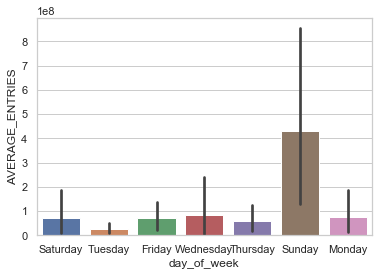

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=merged_df["day_of_week"], y=merged_df["AVERAGE_ENTRIES"], data=tips)